In [4]:
import uptide
import uptide.tidal_netcdf
import os.path
from datetime import datetime
import numpy as np
import utm
import sys
import matplotlib.pyplot as plt
import csv
import pandas as pd
import fes

ImportError: libnetcdf.so.13: cannot open shared object file: No such file or directory

In [35]:
ls

fes_slev.py                        test saving grd file.ipynb
fes_uv.py                          tide_gauge_for_Vala_fes2014.ipynb
gmt_tides/                         tide_gauge_rvk_fes2014.ipynb
iceland_tides_fes2014.ipynb        tide_gauge_validation_iceland_fes2014.ipynb
ioc_rvk_jan23.txt                  tides_62.4N_21.8W_102019_022020.csv
kevin_rvk_ssh.txt                  Untitled1.ipynb
mask_data_for_finding_edge.ipynb   Untitled2.ipynb
max_tide_iceland.ipynb             Untitled3.ipynb
max_tide.txt                       Untitled4.ipynb
min_tide_iceland.ipynb             Untitled5.ipynb
mytide.py                          Untitled6.ipynb
rvk_example.txt                    Untitled7.ipynb
rvk_mmyy_tide.ipynb                Untitled8.ipynb
ssh_sharp2017.ipynb                Untitled.ipynb
stromsurge_ioc_rvk_fes2014 .ipynb


In [3]:
rvk = pd.read_csv('ioc_rvk_jan23.txt', sep = '\t', names = ['ssh'], index_col = 0)

In [4]:
rvk.index = pd.to_datetime(rvk.index)

In [5]:
rvk['ssh_corrected']=rvk['ssh']-02.442

/home/angel/anaconda3/envs/fes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


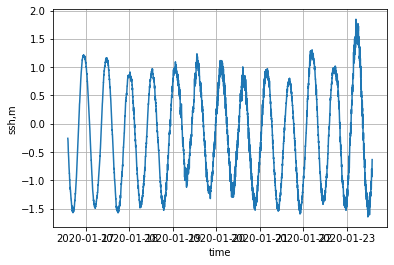

In [6]:
plt.plot(rvk['2020-01-16 14:00:00':'2020-01-23 14:00:00']['ssh']-2.442)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too


In [50]:
kev_rvk = pd.read_csv('kd_rvk_ssh.txt', sep = '\t', names = ['ssh'], index_col = 0)


In [51]:
kev_rvk.index

Index(['1-23-2020 2:00', '1-23-2020 2:05', '1-23-2020 2:10', '1-23-2020 2:15',
       '1-23-2020 2:20', '1-23-2020 2:25', '1-23-2020 2:30', '1-23-2020 2:35',
       '1-23-2020 2:40', '1-23-2020 2:45',
       ...
       '1-23-2020 23:15', '1-23-2020 23:20', '1-23-2020 23:25',
       '1-23-2020 23:30', '1-23-2020 23:35', '1-23-2020 23:40',
       '1-23-2020 23:45', '1-23-2020 23:50', '1-23-2020 23:55',
       '1-24-2020 0:00'],
      dtype='object', length=265)

In [54]:
kev_rvk.index = kev_rvk.index.map(lambda x: datetime.strptime(str(x), '%m-%d-%Y %H:%M'))

In [56]:
kev_rvk.index

DatetimeIndex(['2020-01-23 02:00:00', '2020-01-23 02:05:00',
               '2020-01-23 02:10:00', '2020-01-23 02:15:00',
               '2020-01-23 02:20:00', '2020-01-23 02:25:00',
               '2020-01-23 02:30:00', '2020-01-23 02:35:00',
               '2020-01-23 02:40:00', '2020-01-23 02:45:00',
               ...
               '2020-01-23 23:15:00', '2020-01-23 23:20:00',
               '2020-01-23 23:25:00', '2020-01-23 23:30:00',
               '2020-01-23 23:35:00', '2020-01-23 23:40:00',
               '2020-01-23 23:45:00', '2020-01-23 23:50:00',
               '2020-01-23 23:55:00', '2020-01-24 00:00:00'],
              dtype='datetime64[ns]', length=265, freq=None)

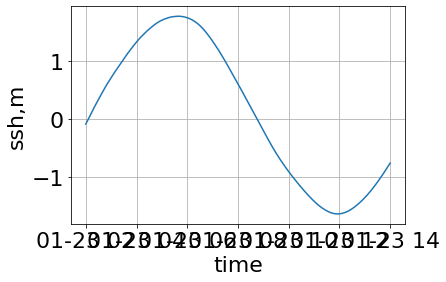

In [55]:
plt.plot(kev_rvk['2020-01-16 14:00':'2020-01-23 14:00']['ssh'])
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too

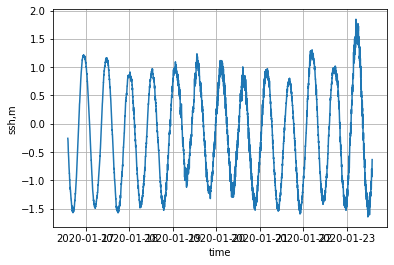

In [8]:
plt.plot(rvk['2020-01-16 14:00:00':'2020-01-23 14:00:00']['ssh_corrected'])
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too

In [9]:
def extract_series(tnci, ll, trange):
    etas = []
    for t in trange:
        tnci.set_time(t)
        eta = tnci.get_val(ll)
        etas.append(eta)
    return etas

In [10]:
tide = uptide.Tides(uptide.ALL_FES2014_TIDAL_CONSTITUENTS)

In [11]:
np.size(uptide.ALL_FES2014_TIDAL_CONSTITUENTS)

33

In [3]:
#tide.set_initial_time(datetime.datetime(2005,3,1,16,0))
tide.set_initial_time(datetime.datetime(2019,8,14,0,0))
tnci = uptide.FES2014TidalInterpolator('/home/angel/tools/fes-2.9.1-Source/data/fes2014/ocean_tide.ini')

NameError: name 'tide' is not defined

In [13]:
tnci.set_initial_time(datetime.datetime(2020,1,16,0,0))

In [15]:
lat = 64.15
lon = 338.06667

In [26]:
dt0 = datetime.datetime(2020,1,16,0,0,0)
trange = np.arange(0., 24.*8., 1/60)*3600.
series = {}

#for dt
#tnci.set_time(9*3600)


In [27]:
series['FES2014'] = extract_series(tnci, (lat, lon), trange)

In [28]:
ee = extract_series(tnci, (lat, lon), trange)

In [29]:
np.size(ee)

11520

In [20]:
24*60*7

10080

In [30]:
arr = dt0 + pd.to_timedelta(np.arange(np.size(ee)), 'm')
#arr = this is making this in minutes 7 days 24hrs/day * 60 min/hr 

In [42]:
arr

DatetimeIndex(['2019-08-14 00:00:00', '2019-08-14 00:01:00',
               '2019-08-14 00:02:00', '2019-08-14 00:03:00',
               '2019-08-14 00:04:00', '2019-08-14 00:05:00',
               '2019-08-14 00:06:00', '2019-08-14 00:07:00',
               '2019-08-14 00:08:00', '2019-08-14 00:09:00',
               ...
               '2019-08-18 23:50:00', '2019-08-18 23:51:00',
               '2019-08-18 23:52:00', '2019-08-18 23:53:00',
               '2019-08-18 23:54:00', '2019-08-18 23:55:00',
               '2019-08-18 23:56:00', '2019-08-18 23:57:00',
               '2019-08-18 23:58:00', '2019-08-18 23:59:00'],
              dtype='datetime64[ns]', length=7200, freq=None)

In [31]:
df = pd.DataFrame({'dates_fes':arr,'ssh_fes':ee}).set_index('dates_fes')

In [32]:
eta = tnci.get_val((lat, lon))

In [45]:
cc = tnci.fh((lat, lon))

TypeError: 'fes.Handler' object is not callable

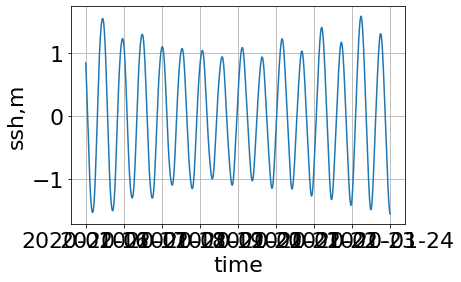

In [33]:
plt.plot(arr,ee)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)

Text(0.5, 1.0, 'RVK, FES vs OBS: January 2020')

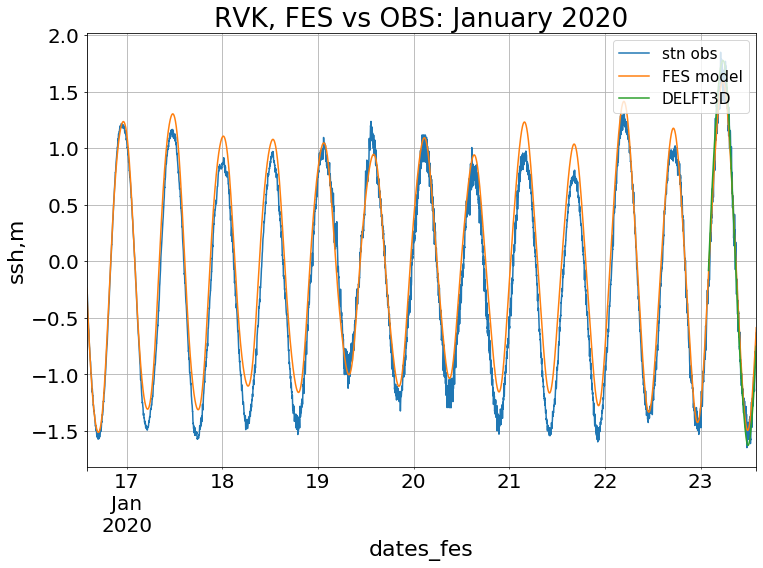

In [57]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
rvk.loc['2020-01-16 14:00:00':'2020-01-23 14:00:00','ssh_corrected'].plot(ax=ax, label='stn obs')
df.loc['2020-01-16 14:00:00':'2020-01-23 14:00:00','ssh_fes'].plot(ax=ax, label='FES model')
kev_rvk.loc['2020-01-16 14:00:00':'2020-01-23 14:00:00','ssh'].plot(ax=ax, label='DELFT3D')
legend=ax.legend(loc='upper right',fontsize = 'x-small')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.rcParams.update({'font.size': 22})
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too
#plt.title('Reykjavik, DMI vs OBS: February 2019')
plt.title('RVK, FES vs OBS: January 2020')

In [83]:
eta

1.3839459172343624

Text(0.5, 1.0, 'RVK: IOC, FES2014, Delft3D (Jan 2020)')

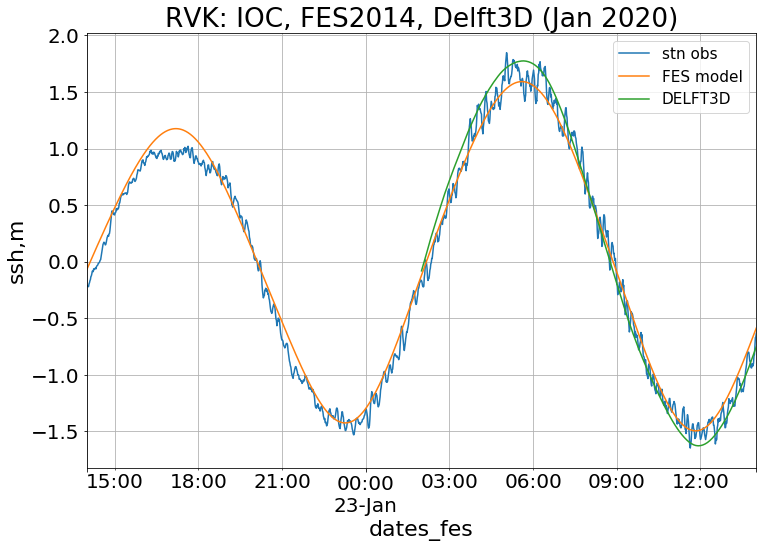

In [59]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
rvk.loc['2020-01-22 14:00:00':'2020-01-23 14:00:00','ssh_corrected'].plot(ax=ax, label='stn obs')
df.loc['2020-01-22 14:00:00':'2020-01-23 14:00:00','ssh_fes'].plot(ax=ax, label='FES model')
kev_rvk.loc['2020-01-22 14:00:00':'2020-01-23 14:00:00','ssh'].plot(ax=ax, label='DELFT3D')
legend=ax.legend(loc='upper right',fontsize = 'x-small')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.rcParams.update({'font.size': 22})
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too
#plt.title('Reykjavik, DMI vs OBS: February 2019')
plt.title('RVK: IOC, FES2014, Delft3D (Jan 2020)')